# Data Science: Primeiros passos I

Fontes para buscar dados
* www.kaggle.com
* www.google search dataset

### Dados e visualização ------------------------------------

In [1]:
import pandas as pd

In [2]:
#Ler arquivo

pd.read_csv("ratings.csv")

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
#Atribuia a notas, para ver so as primeiras 5 linhas
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#linhas x colunas
notas.shape

(100836, 4)

In [5]:
#Redefinindo nomes do cabeçarios
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#Retorna os valores unicos existente no conjunto de dados
notas ['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
#Quantas vezes determinado valor apareceu 
notas ['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
#media de todas as notas
notas ['nota'].mean()

3.501556983616962

<AxesSubplot:>

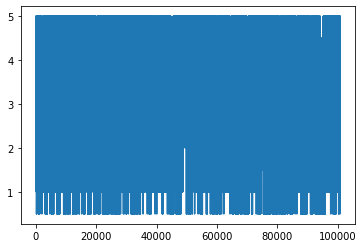

In [9]:
#informações do count
notas.nota.plot()

In [10]:
# Media e Mediana  
print('Media' ,notas ['nota'].mean())
print('Mediana' ,notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [11]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

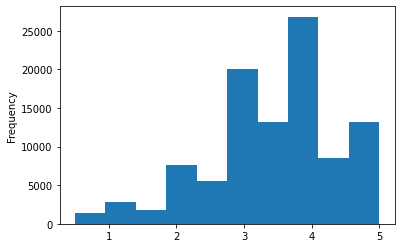

In [12]:
notas.nota.plot(kind='hist')

In [13]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='nota'>

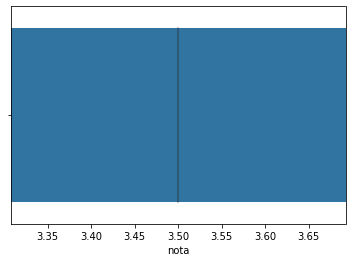

In [14]:
import seaborn as sns

sns.boxenplot(notas.nota)

<AxesSubplot:xlabel='nota'>

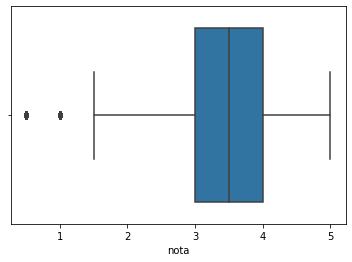

In [15]:
import seaborn as sns

sns.boxplot(notas.nota) #metades das notas estão entre 3 e 4

### Análise exploratória ------------------------------------

In [16]:
filmes= pd.read_csv("movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
filmes= pd.read_csv("movies.csv")
filmes.columns = ["FilmeID", "Titulo", "Generos"]
filmes.head()

,FilmeID,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
#Analisando media da nota pelo ID
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [20]:
#Analisando media do Jumanji  nota pelo ID
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [21]:
# Agrupando, retitando a media apenas da coluna nota
medias_por_filmes = notas.groupby("filmeId").mean()["nota"]
medias_por_filmes.head

<bound method NDFrame.head of filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64>

<AxesSubplot:ylabel='Frequency'>

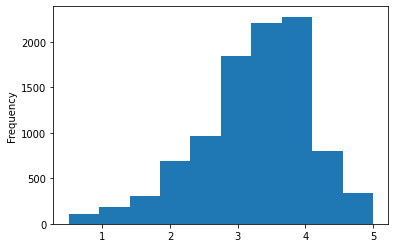

In [22]:
#Medias pore filme em gráfico
medias_por_filmes.plot(kind = 'hist')

<AxesSubplot:ylabel='nota'>

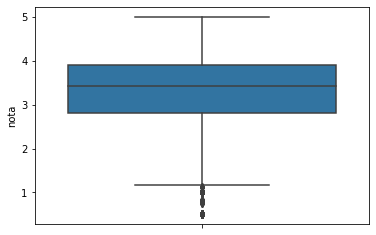

In [23]:
#Determinando o ângulo de visualizazação pelo Y
sns.boxplot(y = medias_por_filmes)

In [24]:
plt.figure(figsize=(5,8))
sns.boxplot(y = medias_por_filmes)

NameError: name 'plt' is not defined

In [ ]:
#Número exato das médias
medias_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\Users\aline\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

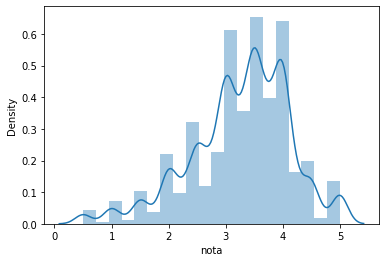

In [ ]:
#Graficos de estograma no seaborn (bins referência a qunt que deseja ver)
sns.distplot(medias_por_filmes, bins = 20)


(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

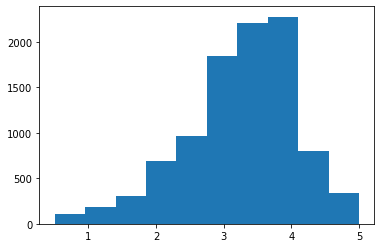

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filmes)

### Variáveis --------------------------------------------------

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#CATEGORIA NOMINAL (verificando as línguas )
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# CAREGORIA ORDINAL
'''
primeiro grau
segundo grau 
terceiro grau 
1 grau < 2 grau  < 3 grau 

'''

'\nprimeiro grau\nsegundo grau \nterceiro grau \n1 grau < 2 grau  < 3 grau \n\n'

budget => orcamento => quantitativa continuo 

quantidade de votos => 1,2,3,4, não tem 2.5 votos 

notas do movielens => 0.5, 1, 1.5 , ...., 5 não tem 2.7

### Data Visualization ------------------------------------

In [ ]:
#Comparando categoria 

tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [ ]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [ ]:

tmdb["original_language"].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [ ]:
#Transformando um aserie em um data frame
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

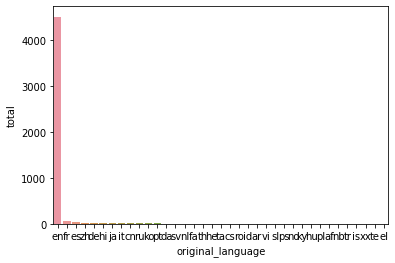

In [ ]:
#Comparando categorias (baixo nivel )
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

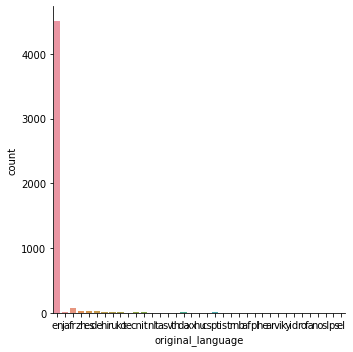

In [ ]:
#Comparando categorias (alto nivel )
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x1d496052950>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

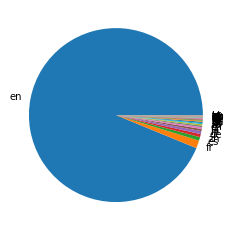

In [ ]:
#Quase nunca recomendado ess gráfico de pizza, atenção na forma de gerar visualização de dados

plt.pie(contagem_de_lingua["total"], labels= contagem_de_lingua ["original_language"])


In [ ]:
total_por_lingua = tmdb ["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(f'Total de inglês: {total_de_ingles}')
print(f'Total das outros idiomas: {total_do_resto}')

Total de inglês: 4505
Total das outros idiomas: 298


In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
   
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [ ]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:>

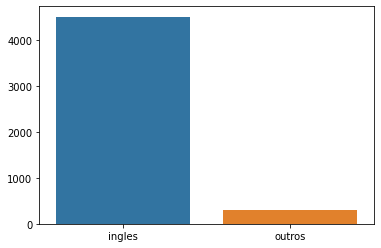

In [ ]:
sns.barplot(x="lingua", y="total", data=dados)

<AxesSubplot:xlabel='lingua', ylabel='total'>

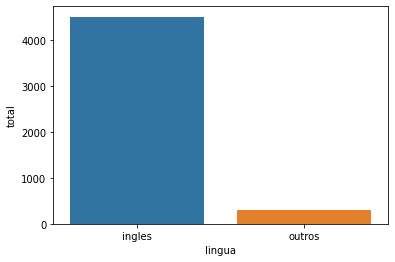

In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto] 
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x1d49875fac0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

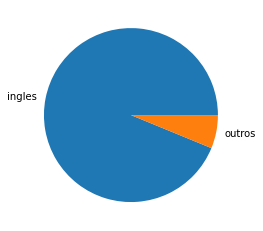

In [ ]:
plt.pie(dados["total"], labels = dados["lingua"])

In [ ]:
#Total dos filmes que são outras linguas
total_por_linguas_de_outros_filmes = tmdb.query("original_language != 'en' ").original_language.value_counts()
total_por_linguas_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

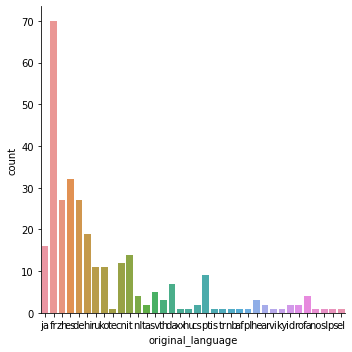

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en' ")
sns.catplot(x = "original_language", kind="count", data=filmes_sem_lingua_original_em_ingles)

### Continuando com Visualização -------------------------------

In [ ]:
filmes.head()

,FilmeID,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.head(2)

,FilmeID,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas.head(2)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [ ]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [ ]:
#Calculo media
print('Nota média do filme Toy Story %.2f' % notas_do_toy_story.nota.mean())
print('Nota média do filme Jumanji %.2f'  % notas_do_jumanji.nota.mean())

Nota média do filme Toy Story 3.92
Nota média do filme Jumanji 3.43


In [ ]:
#Calculo mediana
print('A mediana do filme Toy Story %.2f' % notas_do_toy_story.nota.median())
print('A mediana do filme Jumanji %.2f'  % notas_do_jumanji.nota.median())

A mediana do filme Toy Story 4.00
A mediana do filme Jumanji 3.50


In [ ]:
#Calculo moda 
print('A moda do filme Toy Story %.2f' % notas_do_toy_story.nota.mode())
print('A moda do filme Jumanji %.2f'  % notas_do_jumanji.nota.mode())

A moda do filme Toy Story 4.00
A moda do filme Jumanji 4.00
